<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-01-03 15:24:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  60.7MB/s    in 3.3s    

2025-01-03 15:24:23 (60.6 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 130.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 120.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 45.6 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 121.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 121.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 79.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 15.2 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [16]:
conn = sqlite3.connect('survey-data.sqlite')

In [23]:
QUERY = "SELECT YearsCodePro,Jobsat FROM main"
df = pd.read_sql_query(QUERY, conn)
data=df['JobSat'].dropna()
print(data)

10        8.0
12        8.0
15        5.0
18       10.0
20        6.0
         ... 
65178     8.0
65241     5.0
65265     8.0
65351     8.0
65412     8.0
Name: JobSat, Length: 29126, dtype: float64


## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


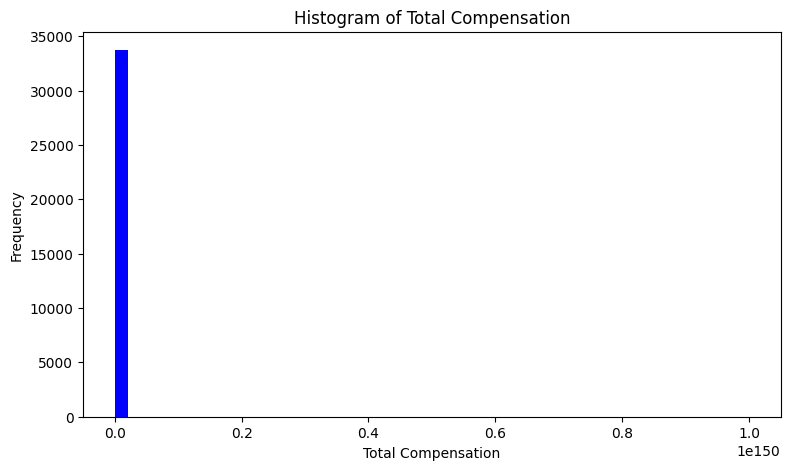

In [9]:
## Write your code here
query = "SELECT CompTotal FROM main"  
df = pd.read_sql_query(query, conn)
data_cleaned = df['CompTotal'].dropna()
plt.figure(figsize=(9,5))
plt.hist(data_cleaned,bins=50,color='blue')
plt.title('Histogram of Total Compensation')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')

plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


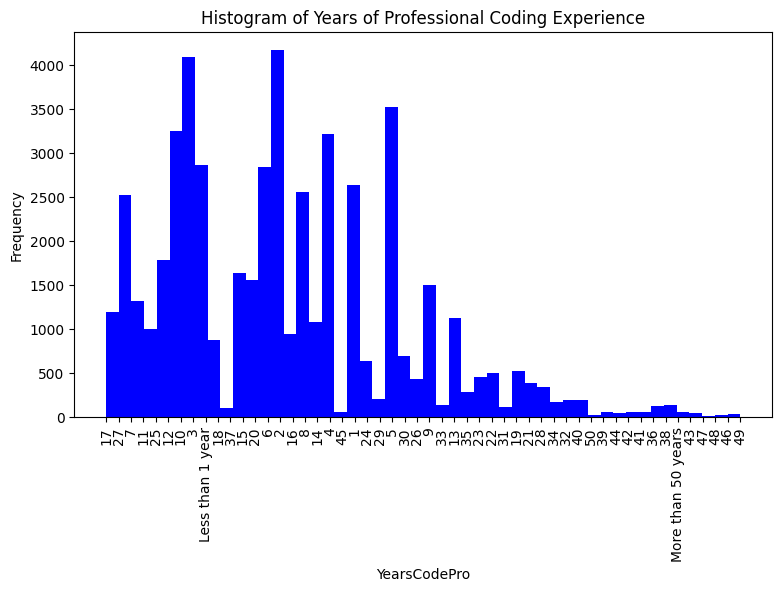

In [10]:
## Write your code here
query = "SELECT YearsCodePro FROM main"  
df = pd.read_sql_query(query, conn)
data_cleaned = df['YearsCodePro'].dropna()
plt.figure(figsize=(9,5))
plt.hist(data_cleaned,bins=50,color='blue')
plt.title('Histogram of Years of Professional Coding Experience')
plt.xlabel('YearsCodePro')
plt.xticks(rotation=90)
plt.ylabel('Frequency')

plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


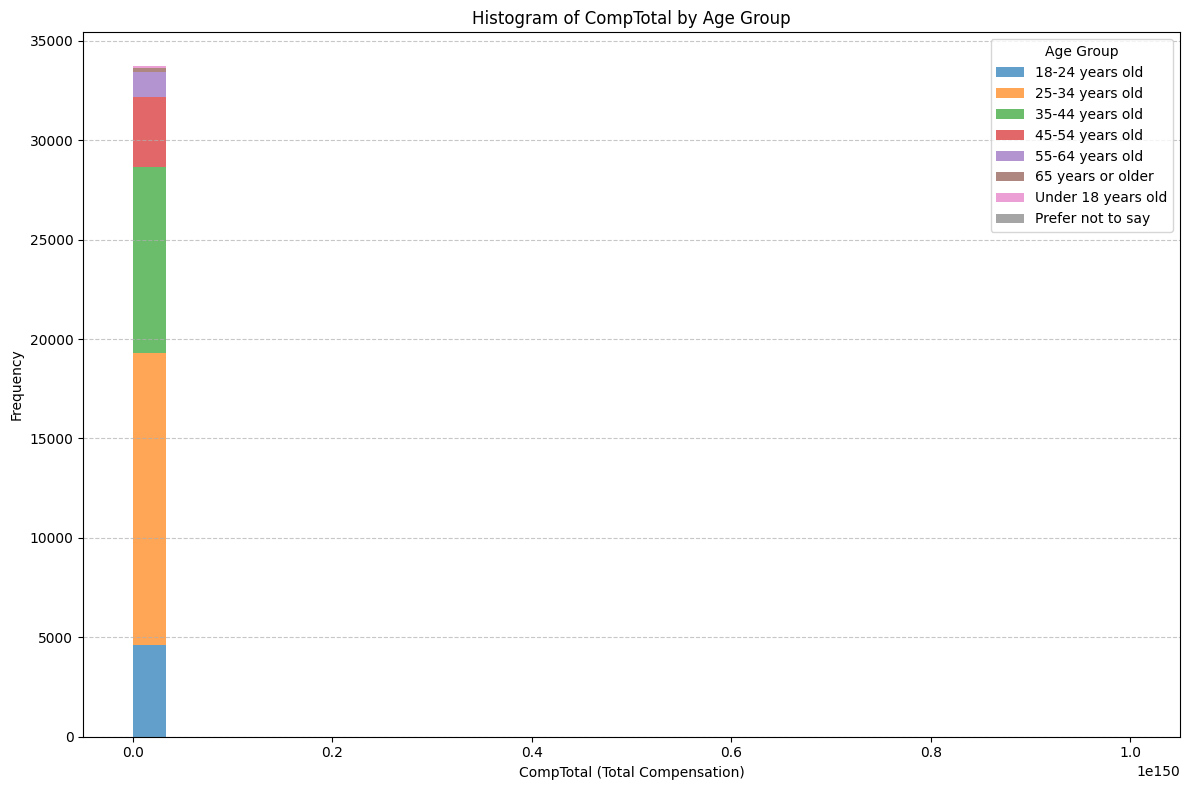

In [11]:

query = """
SELECT Age, CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

age_groups=df['Age'].unique()

# Prepare data for plotting
comp_data_by_age = [df[df['Age'] == age_group]['CompTotal'] for age_group in age_groups]

# Plot a stacked histogram
plt.figure(figsize=(12, 8))
plt.hist(
    comp_data_by_age,
    bins=30,
    stacked=True,
    label=age_groups,
    alpha=0.7
)

# Customize the plot
plt.xlabel('CompTotal (Total Compensation)')
plt.ylabel('Frequency')
plt.title('Histogram of CompTotal by Age Group')
plt.legend(title='Age Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


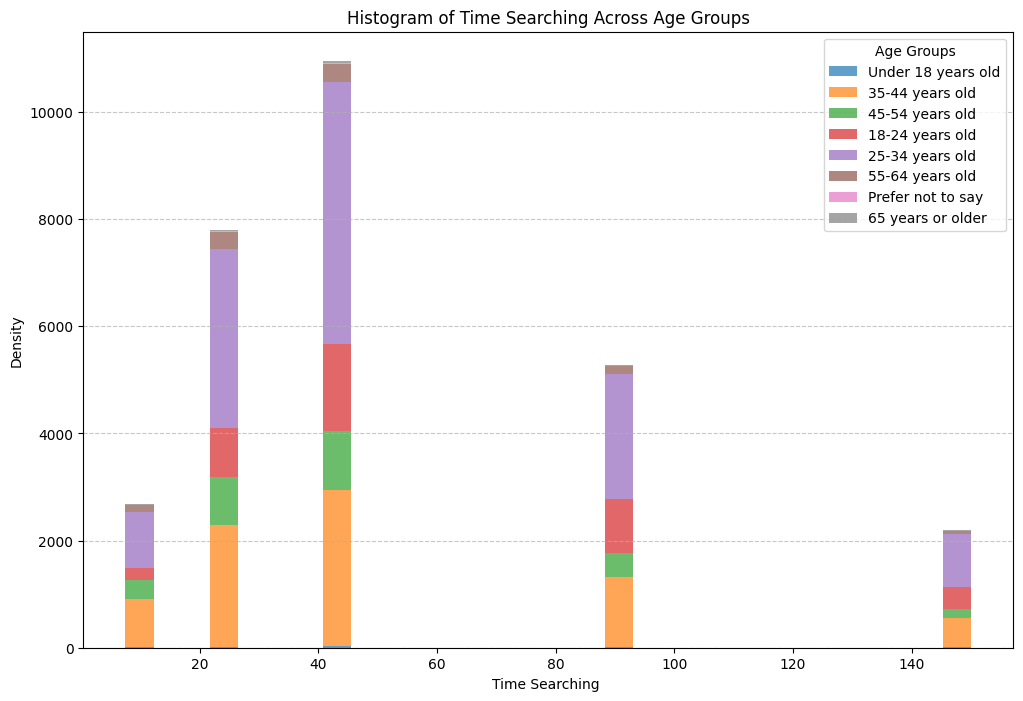

In [12]:
## Write your code here
query = """
SELECT TimeSearching, Age
FROM main
"""
df = pd.read_sql_query(query, conn)
# Mapping categorical time ranges to numeric values (in minutes)
time_mapping = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}
# Replace text ranges with numeric values
df['TimeSearching'] = df['TimeSearching'].map(time_mapping)

# Drop rows with missing or unmapped values

age_groups=df['Age'].unique()
# Prepare data for plotting
time_data_by_age = [df[df['Age'] == age_group]['TimeSearching'] for age_group in age_groups]

# Plot a stacked histogram
plt.figure(figsize=(12, 8))
plt.hist(
    time_data_by_age,
    bins=30,
    stacked=True,
    label=age_groups,
    alpha=0.7
)

# Add labels, title, legend, and grid
plt.xlabel('Time Searching ')
plt.ylabel('Density')
plt.title('Histogram of Time Searching Across Age Groups')
plt.legend(title='Age Groups', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


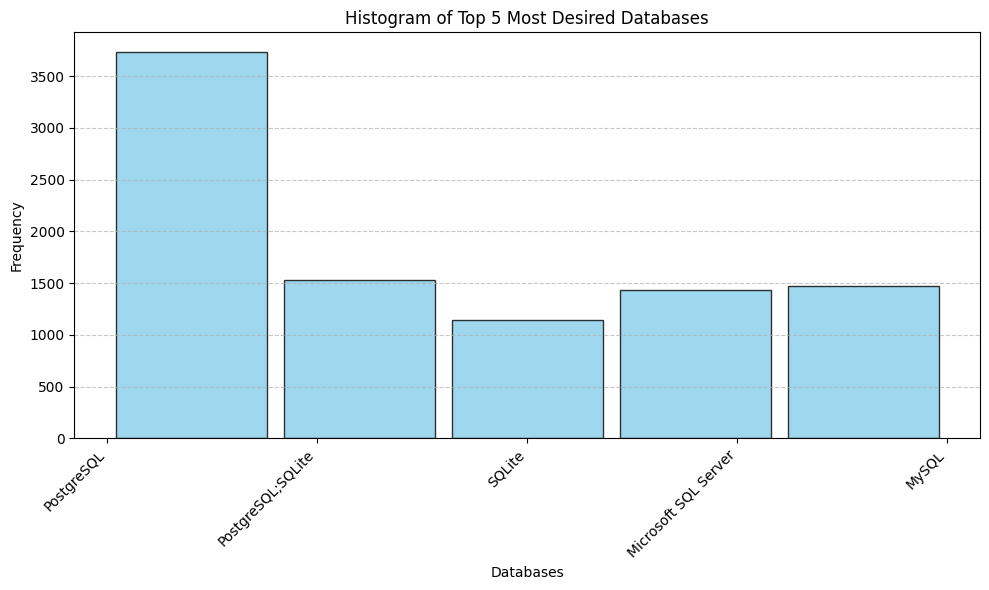

In [13]:
## Write your code her

# Query the data
query = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)


# Process the data
# Split the column into multiple rows if it contains comma-separated values
database_series = df['DatabaseWantToWorkWith'].str.split(',').explode()

# Count occurrences of each database
database_counts = database_series.value_counts()

# Select the top 5 databases
top_databases = database_counts.head(5)

# Plot a histogram-like visualization
plt.figure(figsize=(10, 6))
plt.hist(database_series[database_series.isin(top_databases.index)], bins=len(top_databases), 
         color='skyblue', alpha=0.8, edgecolor='black', rwidth=0.9)

# Add labels and title
plt.xlabel('Databases')
plt.ylabel('Frequency')
plt.title('Histogram of Top 5 Most Desired Databases')
plt.xticks(ticks=range(len(top_databases)), labels=top_databases.index, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


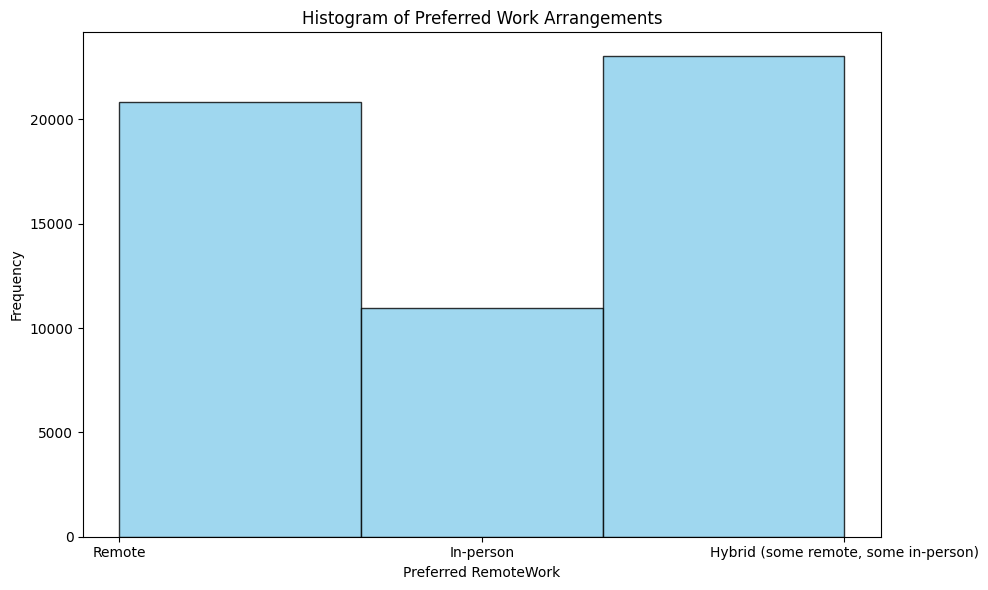

In [14]:
## Write your code here

query = """
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Plot a histogram
plt.figure(figsize=(10, 6))

# Create a histogram using the encoded values
plt.hist(df['RemoteWork'], bins=len(df['RemoteWork'].unique()), edgecolor='black', color='skyblue', alpha=0.8)

# Add labels and title
plt.xlabel('Preferred RemoteWork')
plt.ylabel('Frequency')
plt.title('Histogram of Preferred Work Arrangements')

# Show the plot
plt.tight_layout()
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


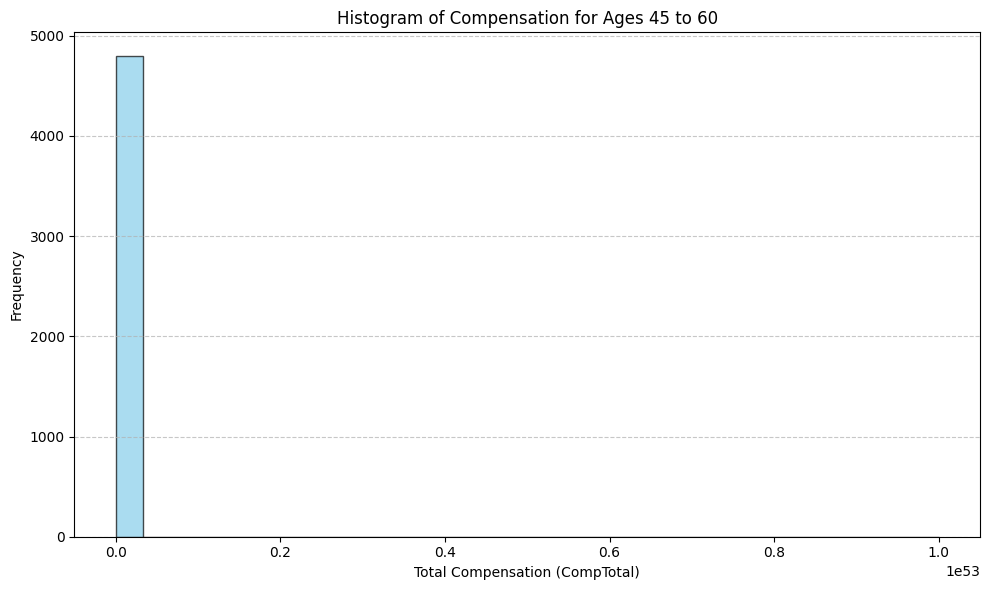

In [15]:
## Write your code here
query = """
SELECT Age, CompTotal
FROM main
WHERE CompTotal IS NOT NULL AND Age IN ('45-54 years old', '55-64 years old')
"""
df = pd.read_sql_query(query, conn)


# Drop rows with missing or invalid CompTotal values
df = df.dropna(subset=['CompTotal'])

# Plot a histogram for compensation distribution
plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels, title, and grid
plt.xlabel('Total Compensation (CompTotal)')
plt.ylabel('Frequency')
plt.title('Histogram of Compensation for Ages 45 to 60')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


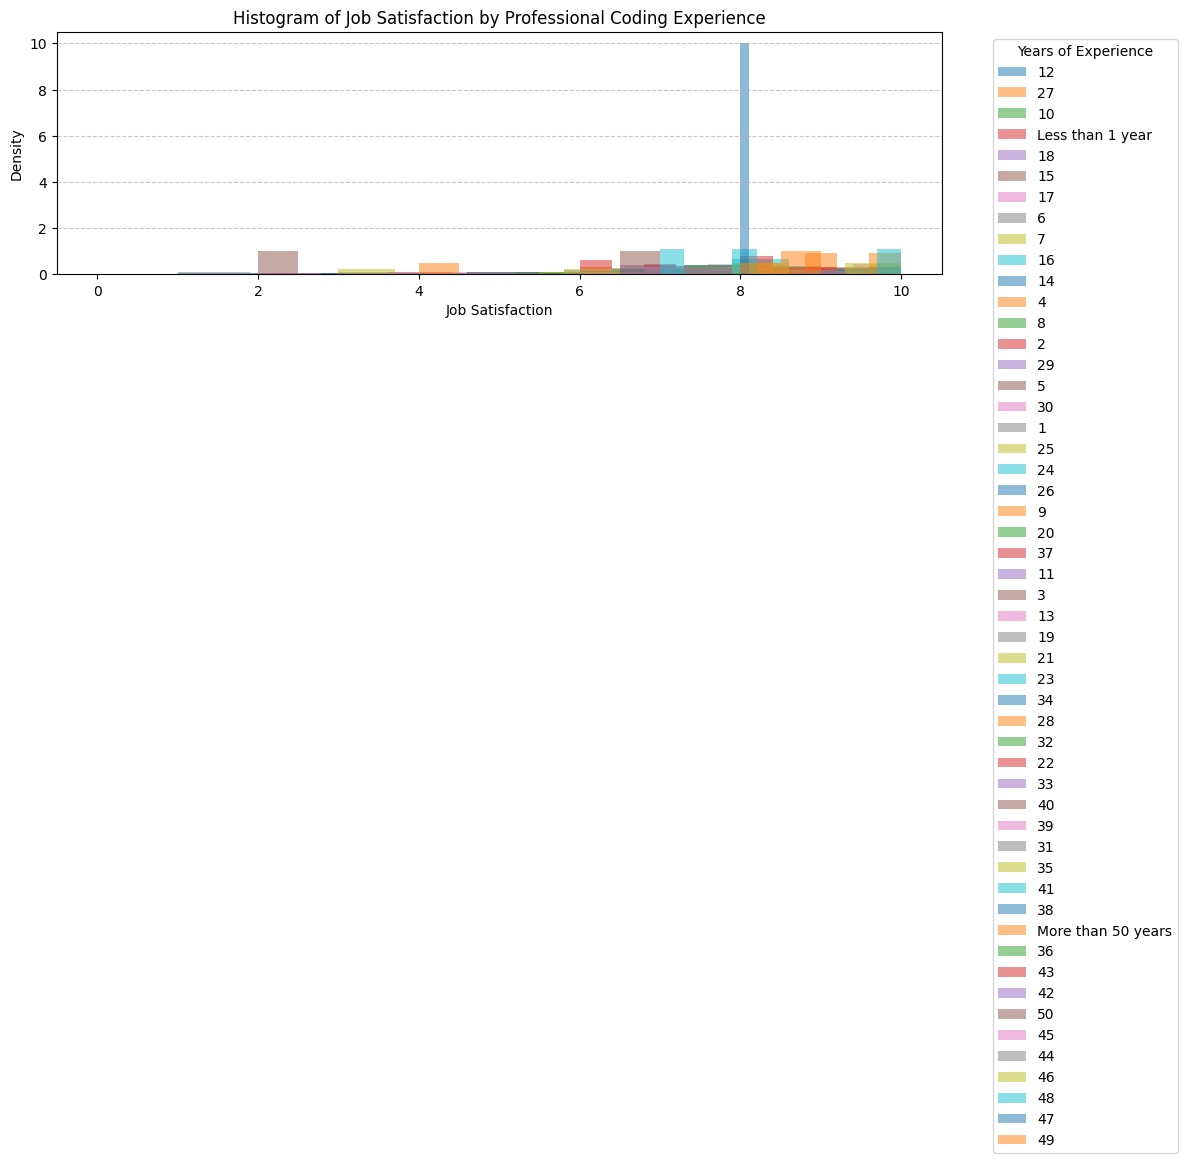

In [27]:
## Write your code here

# Query the data
query = """
SELECT YearsCodePro, JobSat
FROM main
WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Drop missing values
df = df.dropna(subset=['YearsCodePro', 'JobSat'])

# Plot histograms for each unique value of YearsCodePro
plt.figure(figsize=(12, 8))

years_experience = df['YearsCodePro'].unique()
for year in years_experience:
    subset = df[df['YearsCodePro'] == year]
    plt.hist(subset['JobSat'], bins=10, alpha=0.5, label=str(year), density=True)  # Normalized histogram

# Add labels, legend, and grid
plt.xlabel('Job Satisfaction')
plt.ylabel('Density')
plt.title('Histogram of Job Satisfaction by Professional Coding Experience')
plt.legend(title='Years of Experience', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
